In [1]:
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import MDS,Isomap

# Exercise 1

In [2]:
data=pd.read_csv('mysticdata.csv',sep=';')

data.head()

,t,x,y,z
0,0.000000,152.79004,146.01233,184.04712
1,0.005712,140.93199,141.54543,190.74310
2,0.011424,166.84079,157.80817,158.01982
3,0.017136,169.43263,171.46033,142.72464
4,0.022848,145.67673,138.08115,192.44513


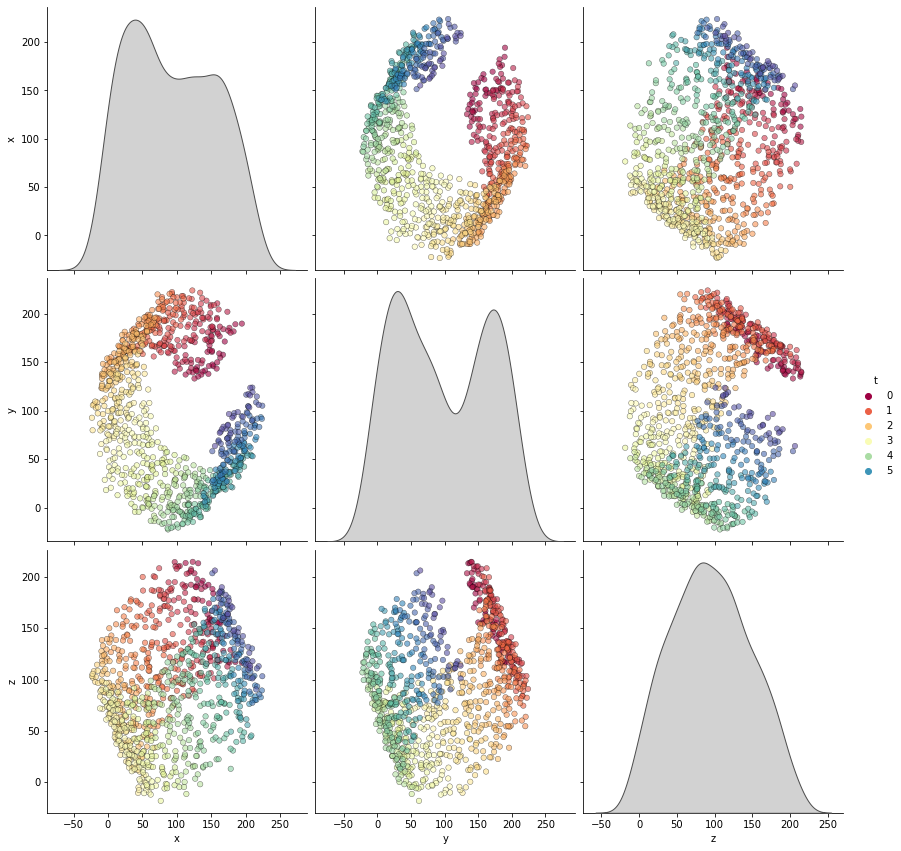

In [3]:
sns.pairplot(data, hue = 't', kind='scatter',diag_kind = 'kde',diag_kws={"hue": None, "color": ".3"},
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'}, palette='Spectral',
             height=4)

In [90]:
xyz=data.loc[:,['x','y','z']]
pca=PCA(n_components=3)
reduction=pca.fit_transform(xyz)
reduction_df=pd.DataFrame(reduction,columns=['PC1','PC2','PC3'])
reduction_df.insert(3,'t',data['t'])
# reduction_df['t']=reduction_df['t'].astype('category')
# print(reduction_df.head())


<AxesSubplot:xlabel='PC1', ylabel='index'>

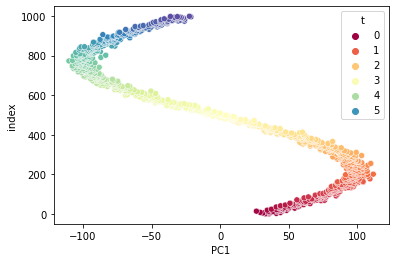

In [5]:
sns.scatterplot(data=reduction_df.reset_index(), x='PC1', y='index',hue='t',palette='Spectral',legend='brief')

<AxesSubplot:xlabel='PC2', ylabel='index'>

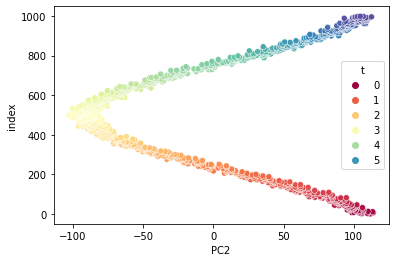

In [6]:
sns.scatterplot(data=reduction_df.reset_index(), x='PC2', y='index',hue='t',palette='Spectral',legend='brief')

<AxesSubplot:xlabel='PC3', ylabel='index'>

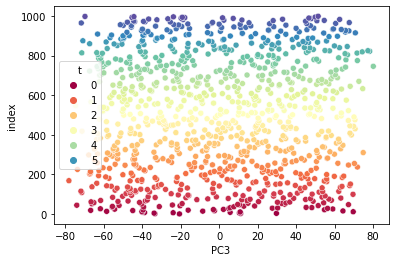

In [7]:
sns.scatterplot(data=reduction_df.reset_index(), x='PC3', y='index',hue='t',palette='Spectral',legend='brief')

<AxesSubplot:xlabel='PC1', ylabel='Count'>

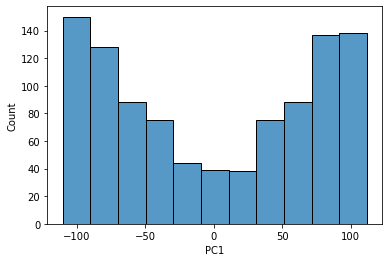

In [8]:
sns.histplot(data=reduction_df,x='PC1')

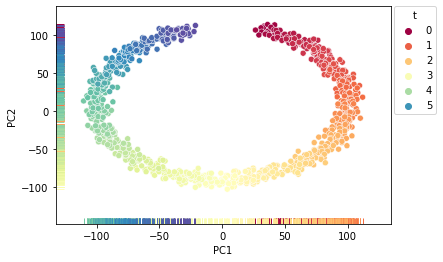

In [93]:
g=sns.scatterplot(data=reduction_df, x='PC1',y='PC2',hue='t',palette='Spectral',legend='brief')
g=sns.rugplot(data=reduction_df, x='PC1',y='PC2',hue='t',palette='Spectral',legend=False)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0,title='t')

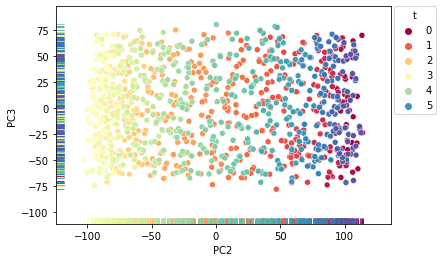

In [92]:
g=sns.scatterplot(data=reduction_df, x='PC2',y='PC3',hue='t',palette='Spectral',legend='brief')
g=sns.rugplot(data=reduction_df, x='PC2',y='PC3',hue='t',palette='Spectral',legend=False)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0,title='t')

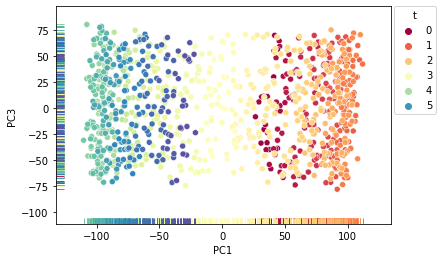

In [91]:
g=sns.scatterplot(data=reduction_df, x='PC1',y='PC3',hue='t',palette='Spectral',legend='brief')
g=sns.rugplot(data=reduction_df, x='PC1',y='PC3',hue='t',palette='Spectral',legend=False)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0,title='t')

In [94]:
embedding = MDS(n_components=1,metric=False)
reduction = embedding.fit_transform(xyz)
reduction_df=pd.DataFrame(reduction,columns=['Dimension1'])
reduction_df.insert(1,'t',data['t'])

<AxesSubplot:xlabel='Dimension1', ylabel='index'>

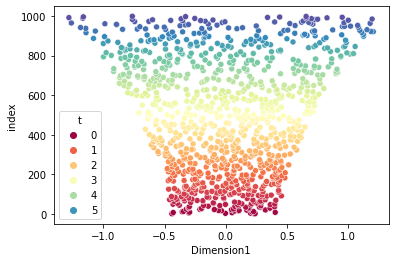

In [95]:
sns.scatterplot(data=reduction_df.reset_index(), x='Dimension1', y='index',hue='t',palette='Spectral',legend='brief')

<AxesSubplot:xlabel='Dimension1', ylabel='Count'>

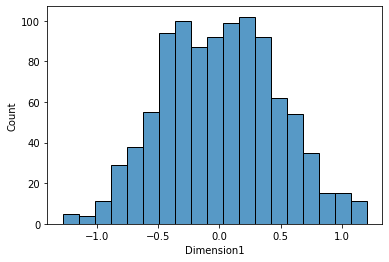

In [97]:
sns.histplot(data=reduction_df,x='Dimension1')

In [13]:
embedding = MDS(n_components=2,metric=False)
reduction = embedding.fit_transform(xyz)
reduction_df=pd.DataFrame(reduction,columns=['Dimension1','Dimension2'])
reduction_df.insert(2,'t',data['t'])

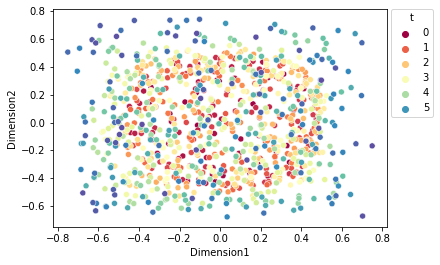

In [14]:
g=sns.scatterplot(data=reduction_df, x='Dimension1',y='Dimension2',hue='t',palette='Spectral',legend='brief')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0,title='t')

In [98]:
embedding = Isomap(n_components=1)
reduction = embedding.fit_transform(xyz)
reduction_df=pd.DataFrame(reduction,columns=['Dimension1'])
reduction_df.insert(1,'t',data['t'])

<AxesSubplot:xlabel='Dimension1', ylabel='index'>

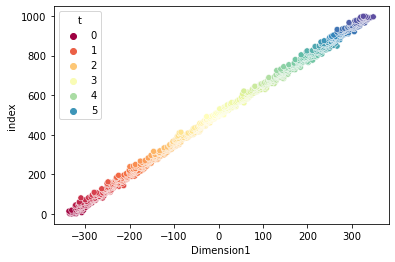

In [99]:
sns.scatterplot(data=reduction_df.reset_index(), x='Dimension1', y='index',hue='t',palette='Spectral',legend='brief')

<AxesSubplot:xlabel='Dimension1', ylabel='Count'>

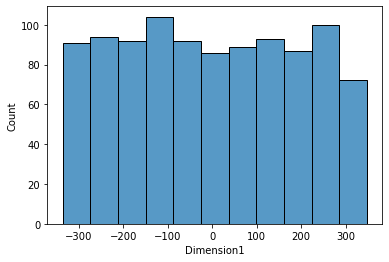

In [100]:
sns.histplot(data=reduction_df,x='Dimension1')

In [17]:
embedding = Isomap(n_components=2)
reduction = embedding.fit_transform(xyz)
reduction_df=pd.DataFrame(reduction,columns=['Dimension1','Dimension2'])
reduction_df.insert(2,'t',data['t'])

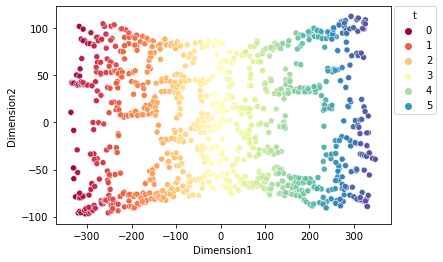

In [18]:
g=sns.scatterplot(data=reduction_df, x='Dimension1',y='Dimension2',hue='t',palette='Spectral',legend='brief')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0,title='t')

# Exercise 2

In [60]:
import sys
sys.path.append('./sammon')
from sammon.sammon import sammon
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt

In [28]:
population=pd.read_csv('population_data.csv',sep=';')
population=population.iloc[1:,2:]
population.head()

,0-4y,5-9y,10-14y,15-19y,20-24y,25-29y,30-34y,35-39y,40-44y,45-49y,50-54y,55-59y,60-64y,65-69y,70-74y,75-79y,80-84y,85-89y,90-y
1,624,959,1075,974,499,608,786,997,1135,1055,1149,1068,1110,1161,1142,682,463,299,182
2,418,548,636,574,324,324,344,390,477,431,528,678,792,763,723,447,348,219,155
3,120,184,182,167,105,101,118,137,117,124,144,177,192,175,151,99,100,65,34
4,535,618,702,660,426,471,475,584,553,558,700,782,833,915,853,584,456,265,167
5,245,357,441,387,212,204,296,392,444,431,521,593,616,766,795,495,340,215,99


In [30]:
distance=pairwise_distances(population)

In [43]:
[y,E]=sammon(distance,n=2,display = 1, inputdist ='distance')

TolFun exceeded: Optimisation terminated


Text(0, 0.5, 'Dimension 2')

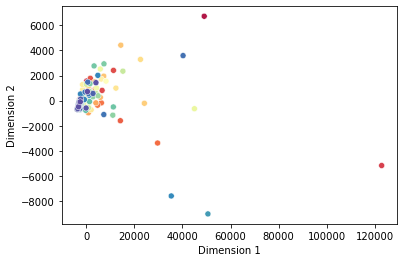

In [88]:
hue=list(range(y.shape[0]))
sns.scatterplot(x=y[:,0],y=y[:,1],hue=hue, palette='Spectral',legend=False)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

Text(0, 0.5, 'distance after mapping')

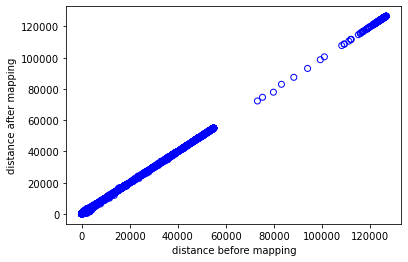

In [89]:
transformed_distance=pairwise_distances(y)

dist_index=np.triu_indices(distance.shape[0],k=1)
# sns.scatterplot(x=distance[dist_index], y=transformed_distance[dist_index],markers=)
plt.scatter(distance[dist_index], transformed_distance[dist_index], facecolors='none', edgecolors='b')
plt.xlabel("distance before mapping")
plt.ylabel("distance after mapping")
# plt.plot(distance[dist_index], transformed_distance[dist_index],'-rx', c='blue',mfc='red', mec='red',ms=9)

In [84]:
population.shape

(309, 19)

In [85]:
embedding=MDS(n_components=2,metric=False)
X_transformed = embedding.fit_transform(population)

Text(0, 0.5, 'Dimension 2')

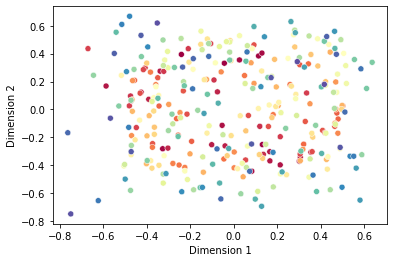

In [86]:
hue=list(range(X_transformed.shape[0]))
sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,1],hue=hue, palette='Spectral',legend=False)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

Text(0, 0.5, 'distance after mapping')

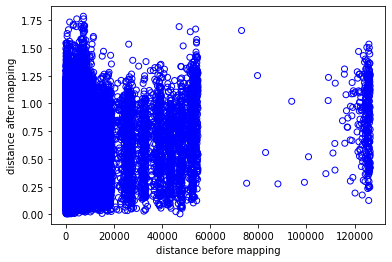

In [87]:
transformed_distance=pairwise_distances(X_transformed)
dist_index=np.triu_indices(distance.shape[0],k=1)
plt.scatter(distance[dist_index], transformed_distance[dist_index], facecolors='none', edgecolors='b')
plt.xlabel("distance before mapping")
plt.ylabel("distance after mapping")